In [18]:
import pandas as pd
import numpy as np
import joblib

In [19]:
rfg = joblib.load('../src/model/random_forest.joblib')
df_profile = pd.read_csv("../src/data/crude_profile.csv")

# Calculate properties of the mixture

In [20]:
def calculate_properties(name1, volume1, name2, volume2):
    """
    Function that calculates and returns the phisical properties of mixture as a dictionary

    Args:
        name1: the name of the crude 1. The upper case matters.
        volume1: the volume of the crude 1 added - unit liters.
        name2: the name of the crude 2. The upper case matters.
        volume2: the volume of the crude 2 added - unit liters.
    Returns:
        The array of the phisical properies of the mixture. (x_pred)
    """
    profile1 = df_profile[df_profile['Name']==name1].iloc[0, :].to_dict()
    profile2 = df_profile[df_profile['Name']==name2].iloc[0, :].to_dict()
    
    x_pred = {}

    # Assume the volume of the mixture is the sum of the two crude volume.
    volume = volume1 + volume2
    v_portion1 = volume1 / volume
    v_portion2 = volume2 / volume
    mass = volume1 * profile1['Absolute Density (kg/m3)'] + volume2 * profile2['Absolute Density (kg/m3)']
    m_portion1 = volume1 * profile1['Absolute Density (kg/m3)'] / mass
    m_portion2 = volume2 * profile2['Absolute Density (kg/m3)'] / mass
    
    # Calculating the phiscial properties of the mixture. (x_pred) 
    x_pred['Absolute Density (kg/m3)'] = mass / volume
    x_pred['Gravity (&degAPI)'] = v_portion1 * profile1['Gravity (&degAPI)'] + v_portion2 * profile2['Gravity (&degAPI)']
    x_pred['Sulphur (wt%)'] =  m_portion1 * profile1['Sulphur (wt%)'] + m_portion2 * profile2['Sulphur (wt%)']
    x_pred['MCR (wt%)'] =  m_portion1 * profile1['MCR (wt%)'] + m_portion2 * profile2['MCR (wt%)']
    x_pred['Sediment (ppmw)'] = m_portion1 * profile1['Sediment (ppmw)'] + m_portion2 * profile2['Sediment (ppmw)']
    x_pred['TAN (mgKOH/g)'] = m_portion1 * profile1['TAN (mgKOH/g)'] + m_portion2 * profile2['TAN (mgKOH/g)']
    x_pred['Salt (ptb)'] = v_portion1 * profile1['Salt (ptb)'] + v_portion2 * profile2['Salt (ptb)']
    x_pred['Nickel (mg/kg)'] = m_portion1 * profile1['Nickel (mg/kg)'] + m_portion2 * profile2['Nickel (mg/kg)']
    x_pred['Vanadium (mg/kg)']  = m_portion1 * profile1['Vanadium (mg/kg)'] + m_portion2 * profile2['Vanadium (mg/kg)']
    x_pred['C2 Ethane (vol%)'] = v_portion1 * profile1['C2 Ethane (vol%)'] + v_portion2 * profile2['C2 Ethane (vol%)']
    x_pred['C3 Propane (vol%)'] = v_portion1 * profile1['C3 Propane (vol%)'] + v_portion2 * profile2['C3 Propane (vol%)']
    x_pred['iC4 iso-Butane (vol%)'] = v_portion1 * profile1['iC4 iso-Butane (vol%)'] + v_portion2 * profile2['iC4 iso-Butane (vol%)']
    x_pred['nC4 n-Butane (vol%)'] = v_portion1 * profile1['nC4 n-Butane (vol%)'] + v_portion2 * profile2['nC4 n-Butane (vol%)']
    x_pred['iC5 iso-Pentane (vol%)'] = v_portion1 * profile1['iC5 iso-Pentane (vol%)'] + v_portion2 * profile2['iC5 iso-Pentane (vol%)']
    x_pred['nC5 n-Pentane (vol%)'] = v_portion1 * profile1['nC5 n-Pentane (vol%)'] + v_portion2 * profile2['nC5 n-Pentane (vol%)']
    x_pred['C6 Hexanes (vol%)'] = v_portion1 * profile1['C6 Hexanes (vol%)'] + v_portion2 * profile2['C6 Hexanes (vol%)']
    x_pred['C7 Heptanes (vol%)'] = v_portion1 * profile1['C7 Heptanes (vol%)'] + v_portion2 * profile2['C7 Heptanes (vol%)']
    x_pred['C8 Octanes (vol%)'] = v_portion1 * profile1['C8 Octanes (vol%)'] + v_portion2 * profile2['C8 Octanes (vol%)']
    x_pred['C9 Nonanes (vol%)'] = v_portion1 * profile1['C9 Nonanes (vol%)'] + v_portion2 * profile2['C9 Nonanes (vol%)']
    x_pred['C10 Decanes (vol%)'] = v_portion1 * profile1['C10 Decanes (vol%)'] + v_portion2 * profile2['C10 Decanes (vol%)']

    return x_pred

# Predict function

In [21]:
def predict(name1, volume1, name2, volume2):
    """
    Function that returns the dictionary distillation profile of the mixture

    Args:
        name1: the name of the crude 1. The upper case matters.
        volume1: the volume of the crude 1 added - unit liters.
        name2: the name of the crude 2. The upper case matters.
        volume2: the volume of the crude 2 added - unit liters.
    Returns:
        the dicrionary of distillation profile of the mixture
        
    """
    # get the array of the phisical properies of the mixture.
    x_pred = calculate_properties(name1, volume1, name2, volume2)

    # generate the x_predict. 
    df_x_pred = pd.DataFrame([x_pred]*21)
    mass_list = list(range(0,100,5))
    mass_list.append(99)
    df_x_pred['%mass'] = np.array(mass_list).reshape(21,1)

    # predict and record the result as a dictionary for further consume
    y_predict = rfg.predict(df_x_pred)
    result = {}
    for i, mass in enumerate(mass_list):
        result[mass] = y_predict[i]

    return result


# Testing

In [26]:
name1 = "Pembina"
name2 = "Fort Hills Dilbit"
volume1 = 1
volume2 = 2

In [27]:
y_pred = predict(name1, volume1, name2, volume2)
y_pred

{0: 33.52635942231842,
 5: 42.95006919960102,
 10: 91.89590225426404,
 15: 124.74253491902705,
 20: 191.44380083652712,
 25: 231.57100104051221,
 30: 266.90110399935054,
 35: 309.5176343336387,
 40: 339.49336960686577,
 45: 369.0569058315183,
 50: 398.8645265782049,
 55: 434.15563211687135,
 60: 457.06703079745387,
 65: 498.524970390015,
 70: 519.5131669195096,
 75: 582.2044089899,
 80: 662.0301068838808,
 85: 689.3668657892252,
 90: 694.8134731636409,
 95: 694.9584743912367,
 99: 695.0279118912367}

<AxesSubplot:>

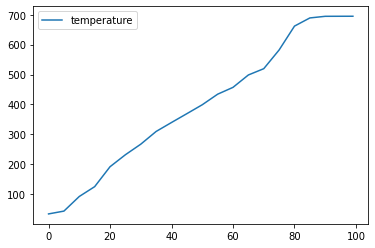

In [28]:
df_pred = pd.DataFrame([y_pred]).T
df_pred.columns = ['temperature']
df_pred.plot()

In [106]:
# np.hstack((np.array(x_pred*21).reshape(21,-1), np.array(mass_list).reshape(21,1)))